# Exercise 7: Application of unsupervised learning

In this exercise we will try to create bank client segmentation with aim to identify their profiles and potential risks assosiated with them. The dataset used represents clients with their demographic and financial behaviour features, we will focus on the latter ones.

## The dataset

The dataset we chose for this exercise is the following one : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset \
It contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 24

In [3]:
df = pd.read_csv('./data/UCI_Credit_Card.csv', index_col='ID')
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1     20000.0    2          2         1   24      2      2     -1     -1   
2    120000.0    2          2         2   26     -1      2      0      0   
3     90000.0    2          2         2   34      0      0      0      0   
4     50000.0    2          2         1   37      0      0      0      0   
5     50000.0    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2       0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3       0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4       0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
5       0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                            
1        0.0       0.0       0.0                           1  
2     1000.0       0.0    2000.0                           1  
3     1000.0    1000.0    5000.0                           0  
4     1100.0    1069.0    1000.0                           0  
5     9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

In [5]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In this exercise we will concentrate on the clients' behaviour and not their demographics.

In [7]:
df = df.drop(columns=['SEX', 'EDUCATION', 'default.payment.next.month', 'MARRIAGE', 'AGE'])
df.columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')

### Credit limit distrubution (`LIMIT_BAL`)

This variable represents the cap on how much one can owe at one time.

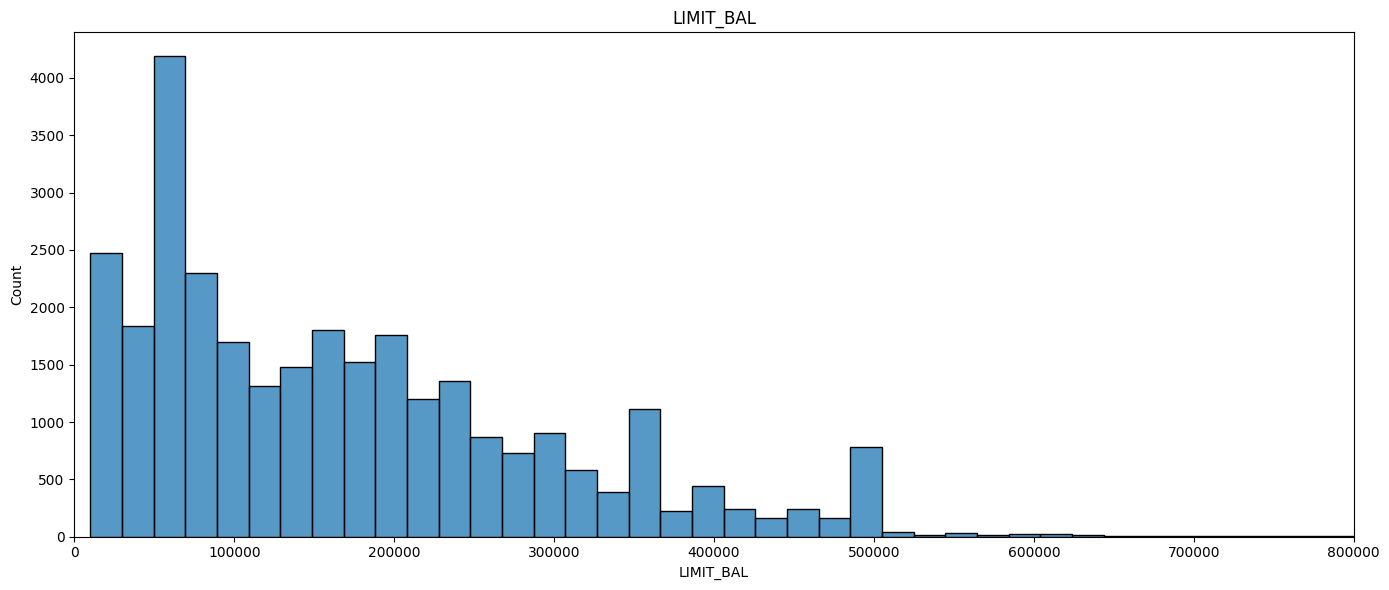

In [213]:
plt.figure(figsize=(14, 6))
sns.histplot(df['LIMIT_BAL'], bins=50, kde=False)
plt.title('LIMIT_BAL')
plt.xlim(0, 800000)
plt.tight_layout()
plt.show()

### How much clients payed in month n (`PAY_AMT[n]`)

Represents the amount of money the client actually paid toward their credit bill in each of the past six months

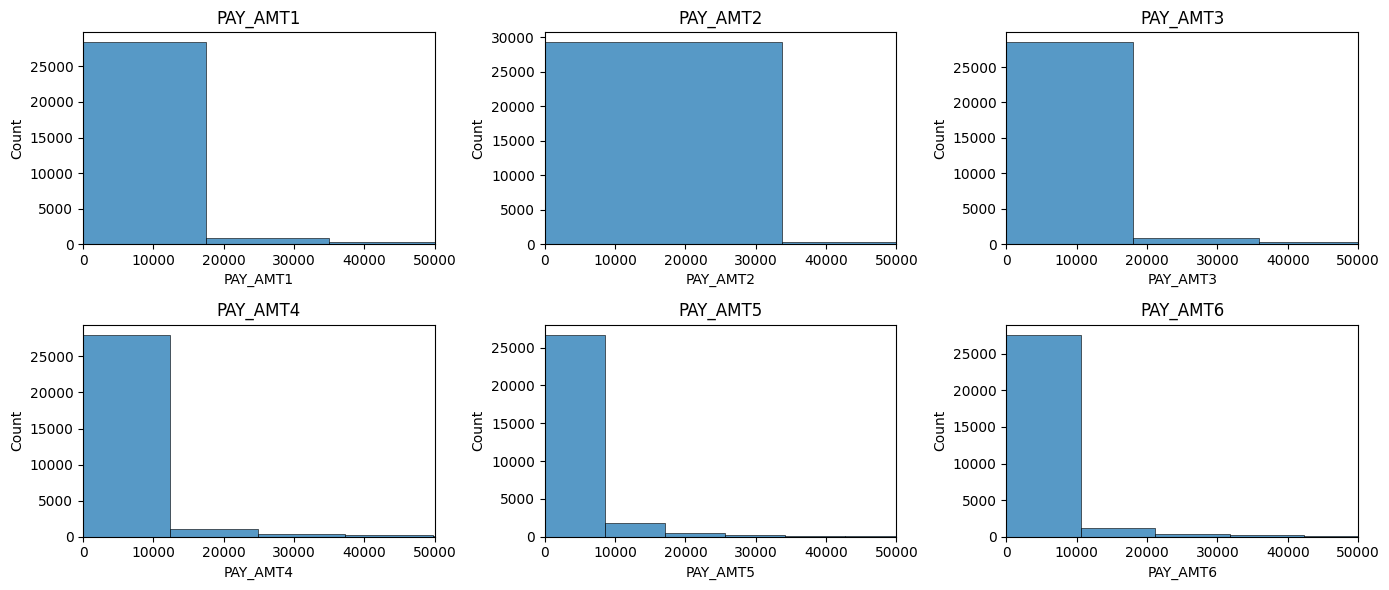

In [201]:
plt.figure(figsize=(14, 6))
for i, col in enumerate([f'PAY_AMT{f}' for f in range(1, 7)]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(col)
    plt.xlim(0, 50000)
plt.tight_layout()
plt.show()

### How much clients owed in month n (`BILL_AMT[n]`)

Represents the monthly bill amounts, the outstanding balance on the client's credit at the end of each month.

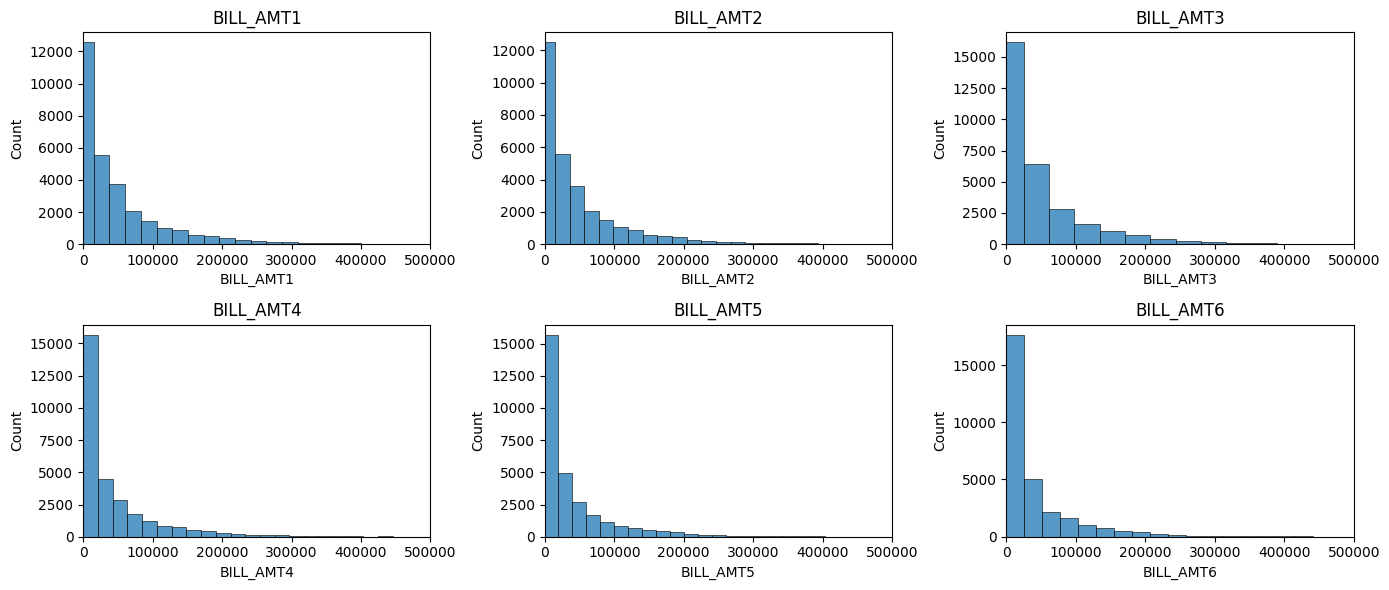

In [209]:
plt.figure(figsize=(14, 6))
for i, col in enumerate([f'BILL_AMT{f}' for f in range(1, 7)]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(col)
    plt.xlim(0, 500000)
plt.tight_layout()
plt.show()

### Were there late payments in month n (`PAY_[n]`)

Represents the payment delay (0 = payed on-time, <0 = payed in advance, >0 = months late)

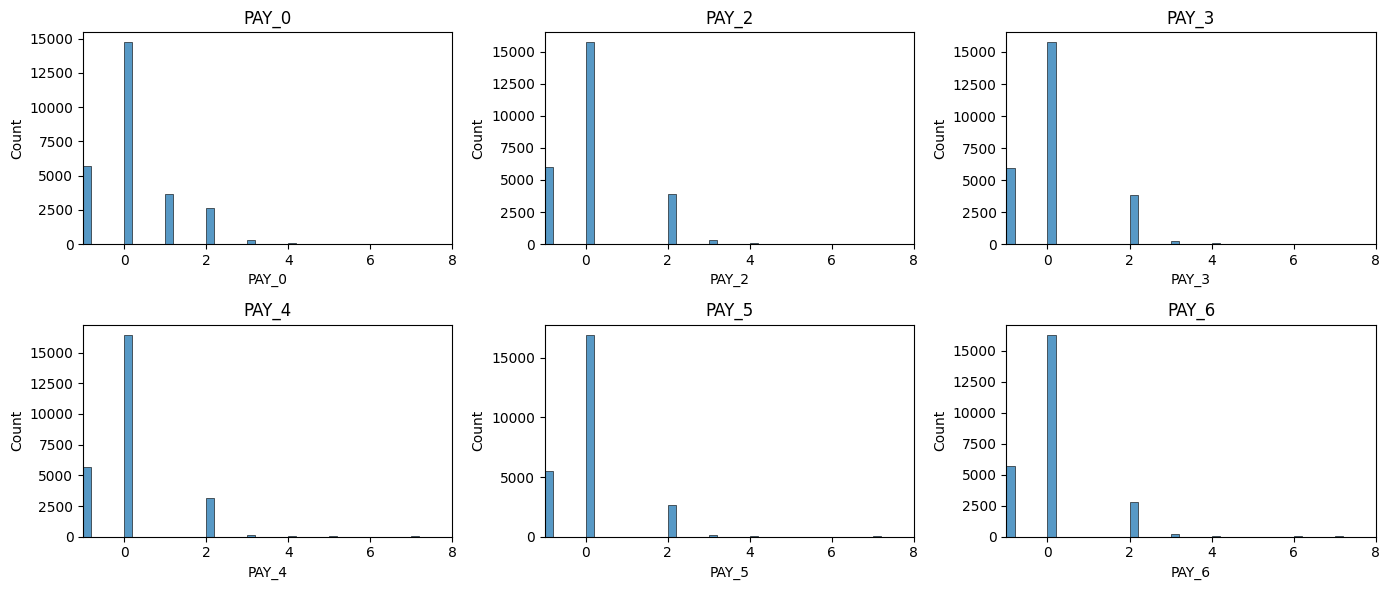

In [198]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(['PAY_0'] + [f'PAY_{f}' for f in range(2, 7)]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(col)
    plt.xlim(-1, 8)
plt.tight_layout()
plt.show()

In [124]:
df.describe().T

count           mean            std       min       25%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
PAY_0      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   

                50%        75%        max  
LIMIT_BAL  140000.0  240000.00  1000000.0  
PAY_0           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0

In order to segment the clients we will use following features:
- `LIMIT_BAL` (credit limit)
- `mean_pay_amt` Average of PAY_AMT columns (how much they pay)
- `mean_bill_amt` Average of BILL_AMT columns (how much they owe)
- `mean_pay` Average of delayed payments

In [214]:
bill_amts = [f'BILL_AMT{f}' for f in range(1, 7)]
df['mean_bill_amt'] = df.apply(lambda row: row[bill_amts].mean(), axis=1)
df = df.drop(columns=bill_amts)

In [215]:
pay_stat_feats = ['PAY_0'] + [f'PAY_{f}' for f in range(2, 7)]
df['mean_pay'] = df.apply(lambda row: row[pay_stat_feats].mean(), axis=1)
df = df.drop(columns=pay_stat_feats)

In [216]:
pay_amts = [f'PAY_AMT{f}' for f in range(1, 7)]
df['mean_pay_amt'] = df.apply(lambda row: row[pay_amts].mean(), axis=1)
df = df.drop(columns=pay_amts)

In [225]:
df

LIMIT_BAL  mean_bill_amt  mean_pay  mean_pay_amt
ID                                                     
1        20000.0    1284.000000 -0.333333    114.833333
2       120000.0    2846.166667  0.500000    833.333333
3        90000.0   16942.166667  0.000000   1836.333333
4        50000.0   38555.666667  0.000000   1398.000000
5        50000.0   18223.166667 -0.333333   9841.500000
...          ...            ...       ...           ...
29996   220000.0  120891.500000  0.000000   7091.666667
29997   150000.0    3530.333333 -0.666667   2415.000000
29998    30000.0   11749.333333  1.333333   5216.666667
29999    80000.0   44435.166667 -0.166667  24530.166667
30000    50000.0   38479.000000  0.000000   1384.666667

[30000 rows x 4 columns]

The correlation matrix show that there is no particularly high pairwise correlation between variables

Text(0.5, 1.0, 'Correlation Matrix of Financial Features')

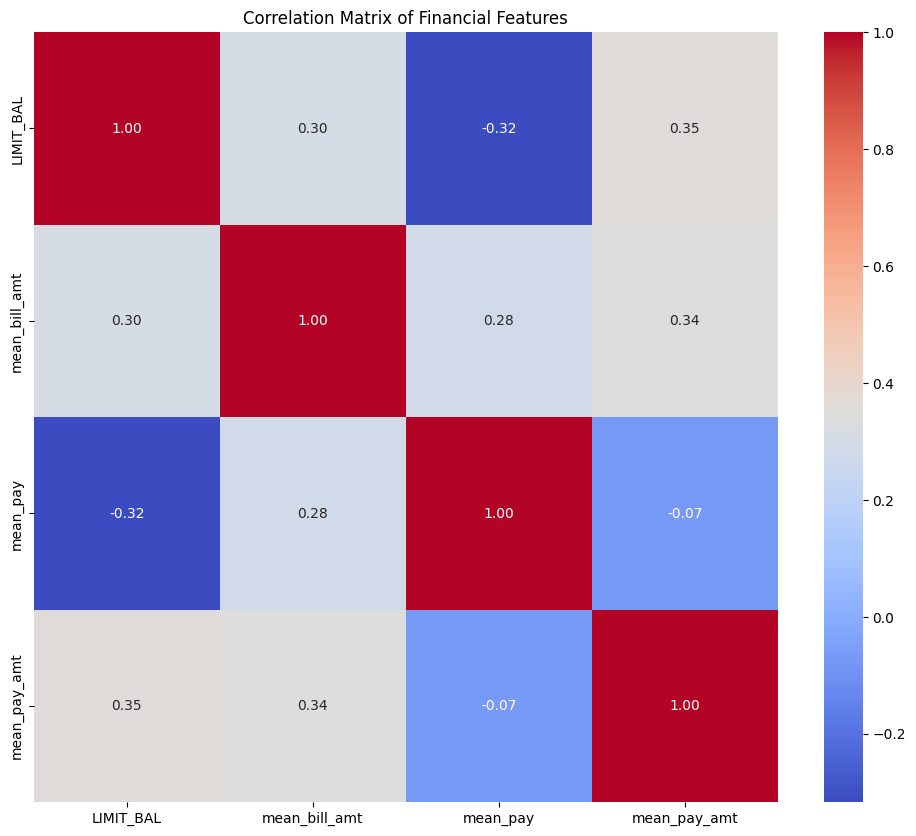

In [162]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Financial Features")

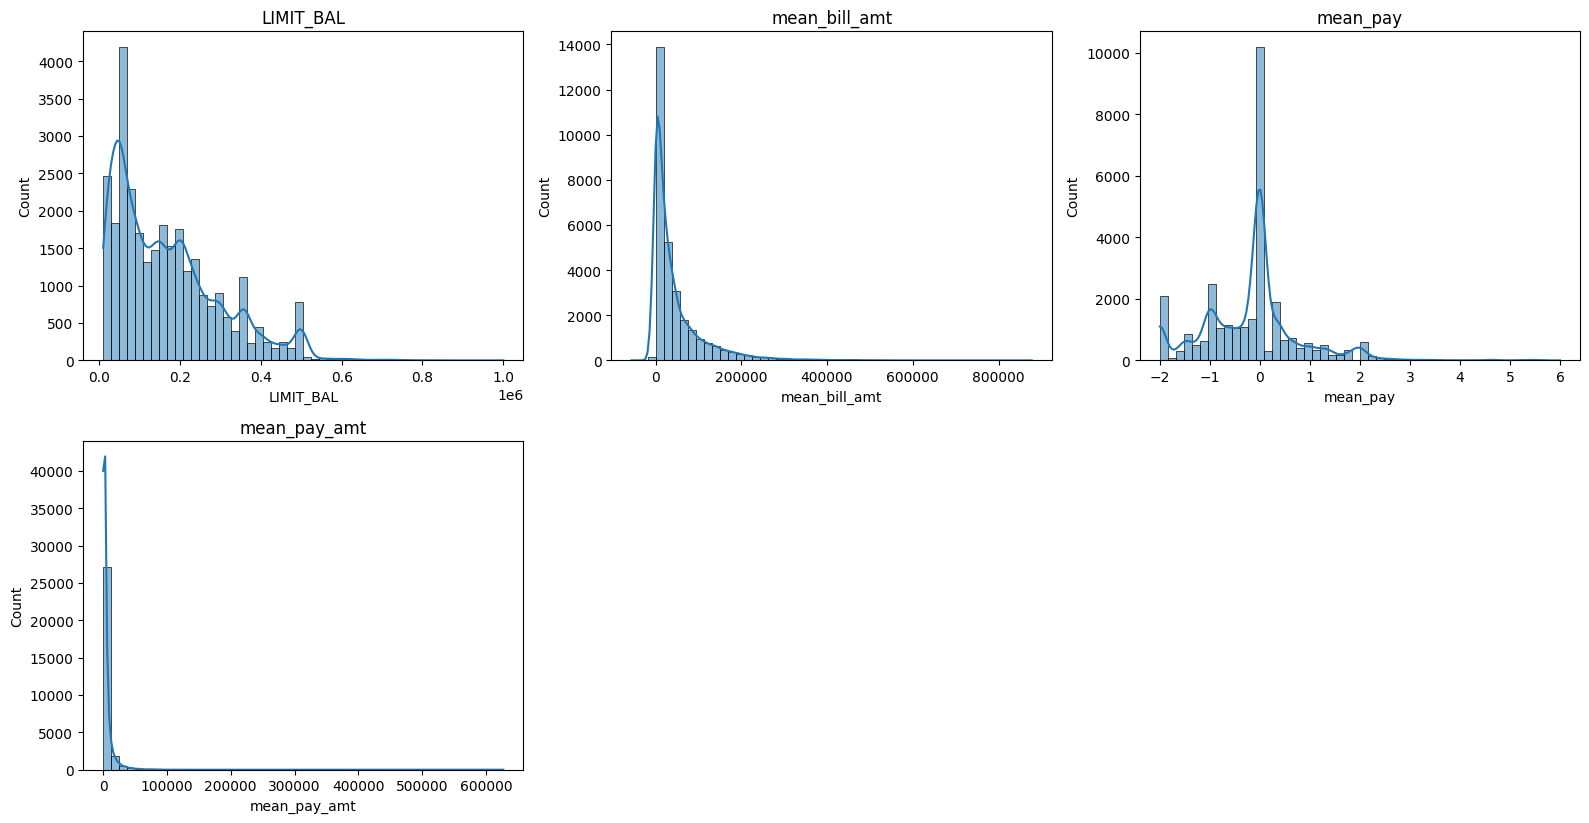

In [163]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In order to normalize the features we will use `StandardScaler`.

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df.values),
    columns=df.columns,
    index=df.index
)
scaled_df

LIMIT_BAL  mean_bill_amt  mean_pay  mean_pay_amt
ID                                                     
1      -1.136720      -0.690692 -0.153635     -0.509027
2      -0.365981      -0.665997  0.694835     -0.438153
3      -0.597202      -0.443170  0.185753     -0.339216
4      -0.905498      -0.101507  0.185753     -0.382454
5      -0.905498      -0.422920 -0.153635      0.450421
...          ...            ...       ...           ...
29996   0.404759       1.200047  0.185753      0.179175
29997  -0.134759      -0.655182 -0.493024     -0.282136
29998  -1.059646      -0.525257  1.543306     -0.005777
29999  -0.674276      -0.008564  0.016059      1.899325
30000  -0.905498      -0.102719  0.185753     -0.383769

[30000 rows x 4 columns]

In [227]:
scaled_df.describe().T

count          mean       std       min       25%       50%  \
LIMIT_BAL      30000.0 -6.063298e-17  1.000017 -1.213794 -0.905498 -0.211833   
mean_bill_amt  30000.0  9.189686e-17  1.000017 -1.596912 -0.635407 -0.378205   
mean_pay       30000.0 -2.084259e-17  1.000017 -1.850576 -0.662718  0.185753   
mean_pay_amt   30000.0  7.863340e-17  1.000017 -0.520354 -0.410538 -0.283895   

                    75%        max  
LIMIT_BAL      0.558907   6.416528  
mean_bill_amt  0.191709  13.157465  
mean_pay       0.185753   6.294740  
mean_pay_amt   0.030449  61.361488

To determine the best number of clusters we will use the Elbow method, Silhouette score and Calinski-Harabasz Index

---

### Elbow Method

The Elbow method evaluates inertia, which is the within-cluster sum of squares (WCSS) between each point and its assigned cluster center:

$$\sum_{i=1}^{n} \left\| x_i - \mu_{c(i)} \right\|^2$$

Where:
- $x_i$ is the $i$-th data point  
- $\mu_{c(i)}$ is the centroid of the cluster assigned to $x_i$  
- $n$ is the total number of data points

The idea is to find centroïds that minimize the WCSS

---

### Silhouette score

The Silhouette Method evaluates how well each point fits in its assigned cluster:

$$s = \frac{b - a}{\max(a, b)}$$


Where:
- $a$: average distance to other points in the same cluster  
- $b$: average distance to points in the nearest other cluster
- $s \in [-1, 1]$

if $s$ is close to:
- 1: The point is well clustered  
- 0: The point lies between two clusters
- -1: The point may be in the wrong cluster

The best clustered number then corresponds to the highest score.

---

## Calinski–Harabasz Index

The Calinski–Harabasz Index is an internal clustering evaluation metric. It evaluates the compactness and separation of clusters:

$$
\text{CH} = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n - k}{k - 1}
$$

Where:

- $n$: total number of data points  
- $k$: number of clusters  
- $\text{Tr}(B_k)$: trace of the between-cluster scatter matrix 
- $\text{Tr}(W_k)$: trace of the within-cluster scatter matrix


Higher CH values indicate better-defined clusters.

## Implementation

### fine tuning of k

In [165]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

batch_size = 1500
wcss = []
scores = []
chs = []
k_range = range(2, 11)
for k in k_range:
    kmeans = MiniBatchKMeans(
        n_clusters=k,
        random_state=random_state,
        batch_size=batch_size
    )
    kmeans.fit(scaled_df.values)
    wcss.append(kmeans.inertia_)
    clusters = kmeans.predict(scaled_df.values)
    score = silhouette_score(scaled_df.values, clusters)
    ch = calinski_harabasz_score(scaled_df.values, clusters)
    chs.append(ch)
    scores.append(score)

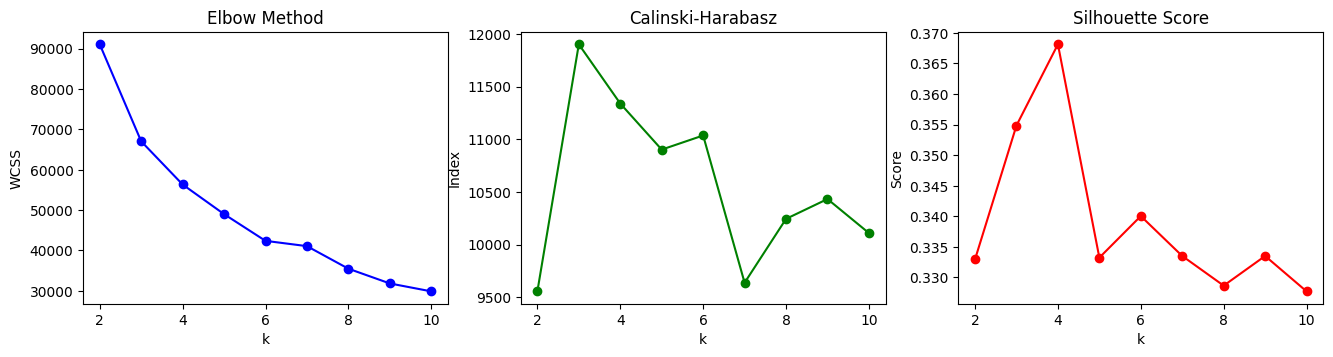

In [178]:
plt.figure(figsize=(16, 12))

ax = plt.subplot(3, 3, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method')

ax = plt.subplot(3, 3, 2)
plt.plot(k_range, chs, 'go-')
plt.xlabel('k')
plt.ylabel('Index')
plt.title('Calinski-Harabasz')

ax = plt.subplot(3, 3, 3)
plt.plot(k_range, scores, 'ro-')
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Silhouette Score")
plt.show()

Elbow and Silhoutte methods suggest that 4 clusters is the best choice while Calinski-Harabasz indicates that k=3 is a better choice. With 4 being the second best for the latest, we will choose 4 create a reasonable segmentation of the clients.

### Clustering

In [228]:
from sklearn.cluster import MiniBatchKMeans
k = 4
kmeans = MiniBatchKMeans(
    n_clusters=k,
    random_state=random_state
)
clusters = kmeans.fit_predict(scaled_df)
final_df = scaled_df.copy()
final_df['cluster'] = clusters

In [229]:
final_df.groupby('cluster')[['LIMIT_BAL', 'mean_pay_amt', 'mean_pay', 'mean_bill_amt']].describe().T

cluster                        0            1             2            3
LIMIT_BAL     count  3533.000000  3522.000000  14555.000000  8390.000000
              mean      1.626119     0.804852     -0.651505     0.107616
              std       0.817755     0.822549      0.465851     0.707443
              min      -0.828424    -0.828424     -1.213794    -1.213794
              25%       1.098425     0.250611     -0.982572    -0.365981
              50%       1.637943     0.558907     -0.828424     0.096463
              75%       2.254534     1.252573     -0.443054     0.558907
              max       4.875049     6.416528      2.254534     1.869164
mean_pay_amt  count  3533.000000  3522.000000  14555.000000  8390.000000
              mean      1.124065     0.528128     -0.250917    -0.259749
              std       2.190974     1.067660      0.273286     0.347967
              min      -0.520354    -0.520354     -0.520354    -0.520354
              25%      -0.116156     0.012192     -0.404443    -0.487474
              50%       0.569760     0.179980     -0.334580    -0.397053
              75%       1.660811     0.541150     -0.197962    -0.168526
              max      61.361488    18.349709      2.570675     2.379854
mean_pay      count  3533.000000  3522.000000  14555.000000  8390.000000
              mean     -0.496050     0.421889      0.602369    -1.013210
              std       0.677561     0.607091      0.792812     0.550497
              min      -1.850576    -1.850576     -0.493024    -1.850576
              25%      -0.832412     0.185753      0.185753    -1.341494
              50%      -0.493024     0.185753      0.185753    -0.832412
              75%       0.185753     0.355447      0.864529    -0.662718
              max       2.391776     5.785658      6.294740     0.355447
mean_bill_amt count  3533.000000  3522.000000  14555.000000  8390.000000
              mean     -0.159539     2.188514     -0.126078    -0.632804
              std       0.571777     1.225748      0.441915     0.139372
              min      -1.596912     0.215159     -0.755694    -1.394740
              25%      -0.573211     1.367096     -0.460955    -0.704325
              50%      -0.357581     1.839123     -0.242800    -0.680729
              75%       0.095504     2.625196      0.106519    -0.619073
              max       5.196448    13.157465      1.372927     0.984217

Let's look at the average client for each cluster.

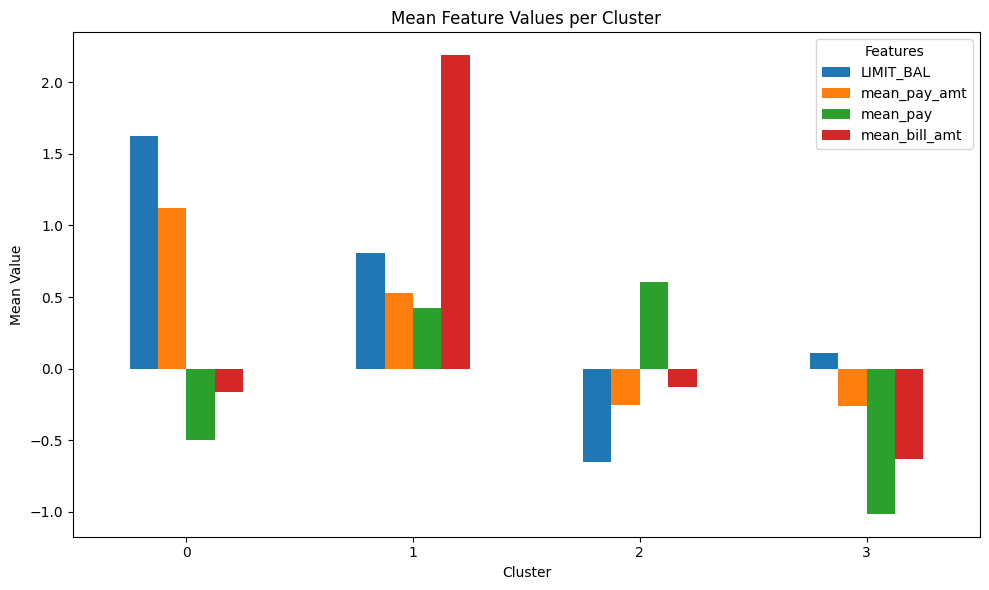

In [188]:
clustered_df = final_df.groupby('cluster')[['LIMIT_BAL', 'mean_pay_amt', 'mean_pay', 'mean_bill_amt']].mean()

clustered_df.plot(kind='bar', figsize=(10, 6))
plt.title("Mean Feature Values per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.legend(title="Features")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Cluster Profiles

Each cluster appears to represent a distinct type of client behavior:

#### Cluster 0 — Wealthy and reliable
- High credit limit
- On-time and early payments
- Moderate bill amounts

This category represents wealthy, low risk, clients who can be potentially proposed vip offers

#### Cluster 1 — Revolvers
- Mid-high limit
- Low (compared to bill amount) pay amount
- High bill amount

These clients are most likely profiting from a revolving loan (a loan without specific term), credit card users for example, can be risky but profitable

#### Cluster 2 - Common clients
- Low limit
- Low bill amount
- Sometimes may be late on paymenets

Most likely common clients who use small personal loans, the biggest cluster

#### Cluster 3 — Reliable
- Small spender
- Low exposure
- Pay always on-time or even early

Reliable clients with very little risk

## We then can use PCA in order to project the clusters onto a 3D space

In [185]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = pca.fit_transform(final_df.values)
df_pca = pd.DataFrame(X, columns=['PC1', 'PC2', 'PC3'], index=final_df.index)
df_pca['cluster'] = final_df['cluster']

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='cluster', opacity=0.7)
fig.update_layout(title='3D PCA Projection (Interactive)')
fig.show()